In [73]:
import numpy as np
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:, 1:-1].values
s = dataset.iloc[:, -1].values
Y=[]
for i in range(0,len(s)):
    if s[i]=='Iris-setosa':
        Y.append(0)
    if s[i]=='Iris-versicolor':
        Y.append(1)
    if s[i]=='Iris-virginica':
        Y.append(2)
Y = np.array(Y)

In [52]:
def fit(X_train, Y_train):
    result = {}
    class_values = set(Y_train)
    for current_class in class_values:
        result[current_class] = {}
        result["total_data"] = len(Y_train)
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1]
        result[current_class]["total_count"] = len(Y_train_current)
        for j in range(1, num_features + 1):
            result[current_class][j] = {}
            all_possible_values = set(X_train[:, j - 1])
            for current_value in all_possible_values:
                result[current_class][j][current_value] = (X_train_current[:, j - 1] == current_value).sum()
                
    return result

In [53]:

def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    num_features = len(dictionary[current_class].keys()) - 1;
    for j in range(1, num_features + 1):
        xj = x[j - 1]
        count_current_class_with_value_xj = dictionary[current_class][j][xj] + 1
        count_current_class = dictionary[current_class]["total_count"] + len(dictionary[current_class][j].keys())
        current_xj_probablity = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
        output = output + current_xj_probablity
    return output

In [54]:

def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class == "total_data"):
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [55]:
def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predictSinglePoint(dictionary, x)
        y_pred.append(x_class)
    return y_pred

In [56]:

def makeLabelled(column):
    second_limit = column.mean()
    first_limit = 0.5 * second_limit
    third_limit = 1.5*second_limit
    for i in range (0,len(column)):
        if (column[i] < first_limit):
            column[i] = 0
        elif (column[i] < second_limit):
            column[i] = 1
        elif(column[i] < third_limit):
            column[i] = 2
        else:
            column[i] = 3
    return column

In [57]:
for i in range(0,X.shape[-1]):
    X[:,i] = makeLabelled(X[:,i])

In [58]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

In [59]:
dictionary = fit(X_train,Y_train)

In [60]:
Y_pred = predict(dictionary,X_test)

In [72]:
count=0
for i in range (0,38):
    
    if (Y_test[i]==Y_pred[i]) :
        
        count+=1
print('accuracy=',count*100/38)

accuracy= 97.36842105263158


In [67]:
def compute_confusion_matrix(true, pred):
  '''Computes a confusion matrix using numpy for two np.arrays
  true and pred.

  Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

  However, this function avoids the dependency on sklearn.'''

  K = len(np.unique(true)) # Number of classes 
  result = np.zeros((K, K))

  for i in range(len(true)):
    result[true[i]][pred[i]] += 1

  return result

In [68]:
compute_confusion_matrix(Y_test, Y_pred)

array([[13.,  0.,  0.],
       [ 0., 16.,  0.],
       [ 0.,  1.,  8.]])

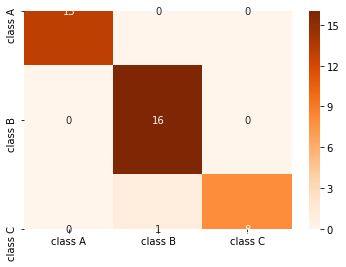

In [70]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn




columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(Y_test))]]

confm = compute_confusion_matrix(Y_test, Y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)


ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)